In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# massIVE-KB

In [4]:
df_test = pd.read_csv('data/test_diff_HPP_AP3.csv')

In [5]:
print(df_test.shape)

(171261, 30)


In [6]:
df_test.head(2)

,miss,314,4,108,1,digestibility,166,90,51,530,...,241,88,49,421,115,48,240,197,354,label
0,1,2.38,0,5.0,0,0.054359,-4.0,36.15,8.0,6.87,...,19.23,-7.20,46.0,95.26,15.7,11.0,-8.34,308.80,21.7,True
1,1,0.14,1,2.0,1,0.044410,1.0,26.67,5.0,3.05,...,-23.28,-2.97,25.0,86.90,14.7,4.0,-5.96,216.18,15.5,True


In [7]:
print('Loading model...')
model = joblib.load("log/AP3_detectability.joblib")
print('Loading input peptides')
X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values

Loading model...
Loading input peptides


Test AUC : 0.8701887772565748
              precision    recall  f1-score   support

       False     0.7864    0.7916    0.7890     86751
        True     0.7846    0.7793    0.7819     84510

    accuracy                         0.7855    171261
   macro avg     0.7855    0.7855    0.7855    171261
weighted avg     0.7855    0.7855    0.7855    171261



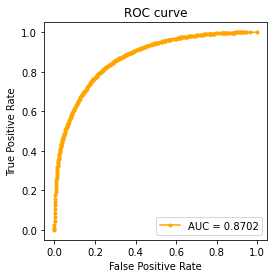

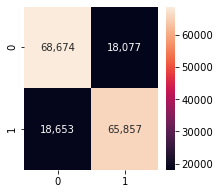

In [8]:
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, probs)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

In [10]:
np.save('log/result_AP3_fpr.npy', fpr)
np.save('log/result_AP3_tpr.npy', tpr)

# Case of cleavage sites count

In [10]:
miss0_idx = np.load('data/AP3_miss0_idx.npy')
miss1_idx = np.load('data/AP3_miss1_idx.npy')
miss2_idx = np.load('data/AP3_miss2_idx.npy')

Test AUC : 0.881636990925923
              precision    recall  f1-score   support

       False     0.7887    0.5749    0.6651     11076
        True     0.8924    0.9581    0.9241     40755

    accuracy                         0.8763     51831
   macro avg     0.8406    0.7665    0.7946     51831
weighted avg     0.8702    0.8763    0.8687     51831



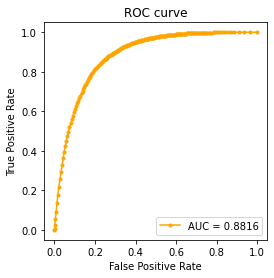

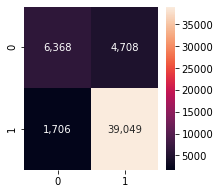

Test AUC : 0.7604699084724041
              precision    recall  f1-score   support

       False     0.7247    0.6126    0.6640     31999
        True     0.6742    0.7750    0.7211     33100

    accuracy                         0.6952     65099
   macro avg     0.6994    0.6938    0.6925     65099
weighted avg     0.6990    0.6952    0.6930     65099



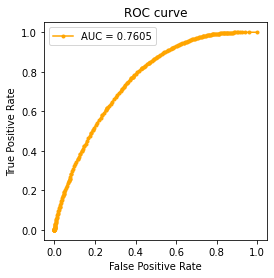

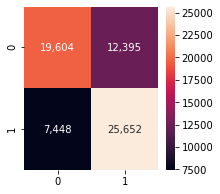

Test AUC : 0.7463883533148772
              precision    recall  f1-score   support

       False     0.8180    0.9777    0.8908     43676
        True     0.5427    0.1085    0.1808     10655

    accuracy                         0.8072     54331
   macro avg     0.6804    0.5431    0.5358     54331
weighted avg     0.7640    0.8072    0.7515     54331



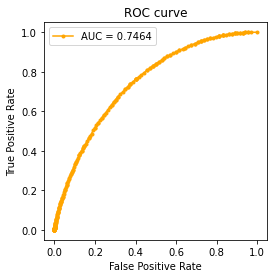

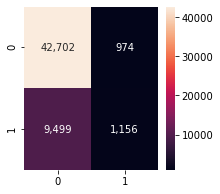

In [11]:
y_pred = np.array(y_pred)
probs_miss0 = probs[miss0_idx]
probs_miss1 = probs[miss1_idx]
probs_miss2 = probs[miss2_idx]
y_pred_miss0 = y_pred[miss0_idx]
y_pred_miss1 = y_pred[miss1_idx]
y_pred_miss2 = y_pred[miss2_idx]
y_test_miss0 = y_test[miss0_idx]
y_test_miss1 = y_test[miss1_idx]
y_test_miss2 = y_test[miss2_idx]

auc = roc_auc_score(y_test_miss0, probs_miss0)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test_miss0, y_pred_miss0, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test_miss0, probs_miss0)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test_miss0, y_pred_miss0)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

auc = roc_auc_score(y_test_miss1, probs_miss1)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test_miss1, y_pred_miss1, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test_miss1, probs_miss1)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test_miss1, y_pred_miss1)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

auc = roc_auc_score(y_test_miss2, probs_miss2)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test_miss2, y_pred_miss2, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test_miss2, probs_miss2)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test_miss2, y_pred_miss2)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

